# **Cats and Dogs Classify**

***

## Preparação do ambiente

### Criação da pasta *data/*

Pasta que vai conter toda a **base de dados**.

In [72]:
!test ! -d data && mkdir data

### Download do arquivo compactado de dados

caso os dados já tenham sido baixados na pasta *data/*, o download não será feito novamente.

In [73]:
!test ! -d data/images && test ! -f data/images.tar.gz && wget -P data https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

### Extração dos dados compactados para a pasta *data/images/*

a extração ocorrerá somente se o arquivo compactado de dados existir dentro da pasta *data/*.

In [74]:
!test -f data/images.tar.gz && tar xf data/images.tar.gz -C data

### Remoção do arquivo compactado de dados da pasta *data/*

In [75]:
!test -f data/images.tar.gz && rm data/images.tar.gz

### Criação e ativação do ambiente virtual (*venv*) juntamente com o download das bibliotecas Python necessárias

caso o ambiente virtual já tenha sido criado, ele será ativado somente.

In [76]:
%%bash

venv_name="cats_and_dogs"

if [ -d "$venv_name" ]; then
    echo "O ambiente $venv_name já existe!"

    source "$venv_name"/bin/activate
else
    pip install virtualenv

    virtualenv -p python3.10 "$venv_name"
    
    chmod +x "$venv_name"/bin/activate
    
    source "$venv_name"/bin/activate
    
    pip install -r requirements.txt
fi

O ambiente cats_and_dogs já existe!


### Bibliotecas utilizadas

In [77]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

***

## Criação do *dataset*

### Setando a *seed*

In [78]:
seed_value = 42

os.environ['PYTHONHASHSEED'] = str(seed_value)

random.seed(seed_value)

np.random.seed(seed_value)
    
tf.random.set_seed(seed_value)

### Extraindo o **caminho** de cada imagem em *.jpg*

outros arquivos não são considerados.

In [79]:
images_path_list = os.listdir('data/images')

images_path_list = ['data/images/' + image_path for image_path in images_path_list if image_path.endswith('.jpg')]

images_path_list

['data/images/wheaten_terrier_192.jpg',
 'data/images/saint_bernard_135.jpg',
 'data/images/boxer_128.jpg',
 'data/images/keeshond_38.jpg',
 'data/images/pomeranian_180.jpg',
 'data/images/Siamese_14.jpg',
 'data/images/British_Shorthair_101.jpg',
 'data/images/japanese_chin_197.jpg',
 'data/images/Birman_19.jpg',
 'data/images/american_bulldog_56.jpg',
 'data/images/leonberger_51.jpg',
 'data/images/Siamese_130.jpg',
 'data/images/english_cocker_spaniel_5.jpg',
 'data/images/Abyssinian_176.jpg',
 'data/images/Siamese_254.jpg',
 'data/images/wheaten_terrier_150.jpg',
 'data/images/Sphynx_61.jpg',
 'data/images/great_pyrenees_79.jpg',
 'data/images/miniature_pinscher_165.jpg',
 'data/images/american_bulldog_102.jpg',
 'data/images/Ragdoll_5.jpg',
 'data/images/shiba_inu_10.jpg',
 'data/images/British_Shorthair_148.jpg',
 'data/images/pomeranian_142.jpg',
 'data/images/english_setter_46.jpg',
 'data/images/boxer_92.jpg',
 'data/images/British_Shorthair_90.jpg',
 'data/images/pug_135.jpg'

### Extraindo o nome das raças de **gato** e **cachorro**

gato e cachorro são as **classes** presentes nos dados.

In [80]:
images_path = [image_path.split('/')[-1] for image_path in images_path_list]

images_name_list = [image_name[:image_name.rfind('_')] for image_name in images_path]

images_name_list

['wheaten_terrier',
 'saint_bernard',
 'boxer',
 'keeshond',
 'pomeranian',
 'Siamese',
 'British_Shorthair',
 'japanese_chin',
 'Birman',
 'american_bulldog',
 'leonberger',
 'Siamese',
 'english_cocker_spaniel',
 'Abyssinian',
 'Siamese',
 'wheaten_terrier',
 'Sphynx',
 'great_pyrenees',
 'miniature_pinscher',
 'american_bulldog',
 'Ragdoll',
 'shiba_inu',
 'British_Shorthair',
 'pomeranian',
 'english_setter',
 'boxer',
 'British_Shorthair',
 'pug',
 'scottish_terrier',
 'german_shorthaired',
 'basset_hound',
 'boxer',
 'boxer',
 'samoyed',
 'saint_bernard',
 'yorkshire_terrier',
 'newfoundland',
 'wheaten_terrier',
 'Sphynx',
 'german_shorthaired',
 'Sphynx',
 'Russian_Blue',
 'Bombay',
 'basset_hound',
 'shiba_inu',
 'Maine_Coon',
 'saint_bernard',
 'basset_hound',
 'scottish_terrier',
 'Egyptian_Mau',
 'leonberger',
 'english_setter',
 'boxer',
 'samoyed',
 'american_bulldog',
 'american_bulldog',
 'Sphynx',
 'english_setter',
 'english_setter',
 'japanese_chin',
 'chihuahua',
 '

Percebe-se aqui que os nomes das raças de gatos estão em **maiúsculo** 

In [81]:
[image_name for image_name in images_name_list if image_name[0].isupper()][:10]

['Siamese',
 'British_Shorthair',
 'Birman',
 'Siamese',
 'Abyssinian',
 'Siamese',
 'Sphynx',
 'Ragdoll',
 'British_Shorthair',
 'British_Shorthair']

e os de cachorro estão em **minúsculo**.

In [82]:
[image_name for image_name in images_name_list if not image_name[0].isupper()][:10]

['wheaten_terrier',
 'saint_bernard',
 'boxer',
 'keeshond',
 'pomeranian',
 'japanese_chin',
 'american_bulldog',
 'leonberger',
 'english_cocker_spaniel',
 'wheaten_terrier']

### Definindo um identificador numérico para cada **classe**

* 1 se gato
* 0 se cachorro

In [83]:
species_id_list = [1 if image_name[0].isupper() else 0 for image_name in images_name_list]

species_id_list[:10]

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0]

### Criando o *DataFrame* de dados

In [84]:
dataset = pd.DataFrame({'image_path': images_path_list, 'name': images_name_list, 'specie': species_id_list})

dataset

,image_path,name,specie
0,data/images/wheaten_terrier_192.jpg,wheaten_terrier,0
1,data/images/saint_bernard_135.jpg,saint_bernard,0
2,data/images/boxer_128.jpg,boxer,0
3,data/images/keeshond_38.jpg,keeshond,0
4,data/images/pomeranian_180.jpg,pomeranian,0
...,...,...,...
7385,data/images/samoyed_91.jpg,samoyed,0
7386,data/images/Siamese_64.jpg,Siamese,1
7387,data/images/boxer_96.jpg,boxer,0
7388,data/images/Siamese_128.jpg,Siamese,1


### *Plot* de alguns exemplos

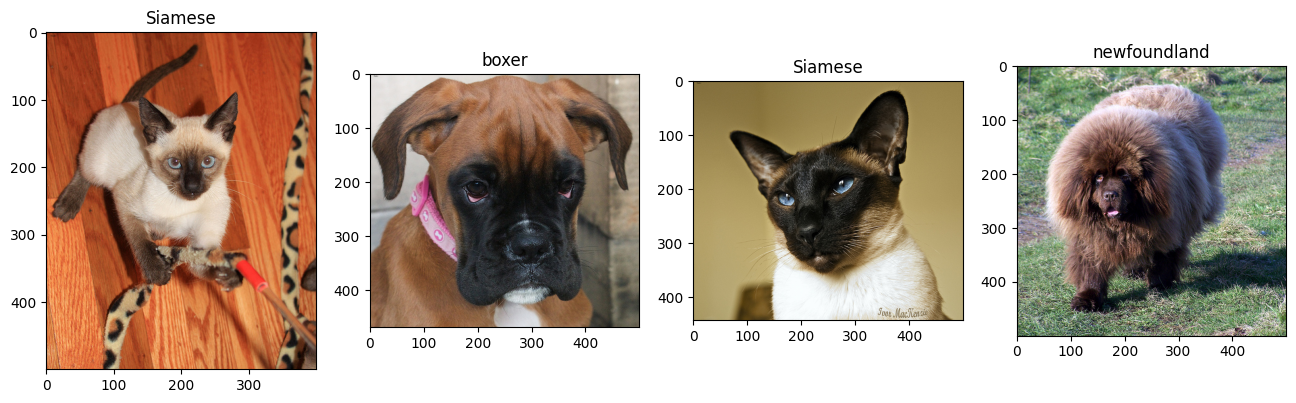

In [85]:
image_list = dataset.tail(4)['image_path'].values
names_list = dataset.tail(4)['name'].values
#specie_list = dataset.tail(4)['specie'].values

rows = 1
columns = 4

fig = plt.figure(figsize = (16, 8))

for i in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, i)

    pil_im = Image.open(image_list[i-1])
    im_array = np.asarray(pil_im)
    
    plt.imshow(im_array)

    plt.title(names_list[i-1])
    #plt.text(0.5, -0.20, specie_list[i-1], ha = 'center', transform = plt.gca().transAxes)

plt.show()

***

## Avaliando os Dados

verificar a quantidade de cada classe para evitar **desbalanceamento**, para isso será criado um conjunto (*set*) com todas as raças de ambas as classes.

Conjuntos tem a propriedade de **não** possuírem elementos repetidos.

In [86]:
classes_set = set(images_name_list)

classes_set

{'Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier'}

### **Quantidade** de raças da classe gato

In [87]:
cats_set = {cat for cat in classes_set if cat[0].isupper()}

print('raças de gato: ' + str(len(cats_set)))

raças de gato: 12


### **Frequência** de cada raça da classe gato

In [88]:
cat_dataframe = dataset.loc[dataset['specie'] == 1]

print('Quantidade de imagens de gatos: ' + str(len(cat_dataframe)))

Quantidade de imagens de gatos: 2400


In [89]:
freq_cat_races = cat_dataframe['name'].value_counts()

freq_cat_races

name
Siamese              200
British_Shorthair    200
Birman               200
Abyssinian           200
Sphynx               200
Ragdoll              200
Russian_Blue         200
Bombay               200
Maine_Coon           200
Egyptian_Mau         200
Persian              200
Bengal               200
Name: count, dtype: int64

### **Quantidade** de raças da classe cachorro

In [90]:
dogs_set = {dog for dog in classes_set if not dog[0].isupper()}

print('raças de cachorro: ' + str(len(dogs_set)))

raças de cachorro: 25


### **Frequência** de cada raça da classe cachorro

In [91]:
dog_dataframe = dataset.loc[dataset['specie'] == 0]

print('quantidade de imagens de cachorro: ' + str(len(dog_dataframe)))

quantidade de imagens de cachorro: 4990


In [92]:
freq_dog_races = dog_dataframe['name'].value_counts()

freq_dog_races

name
wheaten_terrier               200
saint_bernard                 200
havanese                      200
beagle                        200
american_pit_bull_terrier     200
chihuahua                     200
newfoundland                  200
yorkshire_terrier             200
samoyed                       200
basset_hound                  200
german_shorthaired            200
pug                           200
english_setter                200
shiba_inu                     200
miniature_pinscher            200
great_pyrenees                200
english_cocker_spaniel        200
leonberger                    200
american_bulldog              200
japanese_chin                 200
pomeranian                    200
keeshond                      200
boxer                         200
scottish_terrier              199
staffordshire_bull_terrier    191
Name: count, dtype: int64

***

## Divisão dos Dados em **Treino**, **Teste** e **Validação**

* 70% para treino
* 20% para validação
* 10% para teste

In [93]:
def train_test_valid_sep(dataset: pd.DataFrame) -> pd.DataFrame | pd.DataFrame | pd.DataFrame:
    '''
    Função para dividir o dataset atual em treino, teste e validação respeitando a porporção das raças na coluna `name`.

    Args:
        * `dataset`: base de dados de gato ou cachorro.

    Returns:
        DataFrame `treino`, DataFrame `teste`, DataFrame `validação`
    '''

    train_df, temp_df = train_test_split(dataset, train_size = 0.7, stratify = dataset['name'])

    valid_df, test_df = train_test_split(temp_df, test_size = 0.3, stratify = temp_df['name'])

    return train_df, test_df, valid_df

### Divisão dos dados para **gato** e **cachorro**

In [94]:
cat_train, cat_test, cat_valid = train_test_valid_sep(cat_dataframe)

In [98]:
dog_train, dog_test, dog_valid = train_test_valid_sep(dog_dataframe)

### Unificação das bases

In [102]:
train_df = pd.concat([cat_train, dog_train])

test_df = pd.concat([cat_test, dog_test])

valid_df = pd.concat([cat_valid, dog_valid])

In [103]:
train_df

,image_path,name,specie
2407,data/images/Maine_Coon_128.jpg,Maine_Coon,1
456,data/images/Abyssinian_132.jpg,Abyssinian,1
1572,data/images/Sphynx_14.jpg,Sphynx,1
209,data/images/Bombay_8.jpg,Bombay,1
7293,data/images/Birman_17.jpg,Birman,1
...,...,...,...
5852,data/images/newfoundland_126.jpg,newfoundland,0
2972,data/images/american_bulldog_84.jpg,american_bulldog,0
1343,data/images/scottish_terrier_102.jpg,scottish_terrier,0
3538,data/images/scottish_terrier_195.jpg,scottish_terrier,0


In [104]:
test_df

,image_path,name,specie
1918,data/images/Sphynx_164.jpg,Sphynx,1
1669,data/images/Russian_Blue_101.jpg,Russian_Blue,1
712,data/images/Ragdoll_235.jpg,Ragdoll,1
413,data/images/Bombay_65.jpg,Bombay,1
4108,data/images/Egyptian_Mau_81.jpg,Egyptian_Mau,1
...,...,...,...
5474,data/images/pug_8.jpg,pug,0
4649,data/images/english_setter_193.jpg,english_setter,0
1657,data/images/yorkshire_terrier_16.jpg,yorkshire_terrier,0
5725,data/images/american_bulldog_12.jpg,american_bulldog,0


In [105]:
valid_df

,image_path,name,specie
7233,data/images/Bombay_75.jpg,Bombay,1
3934,data/images/Siamese_205.jpg,Siamese,1
6867,data/images/Abyssinian_12.jpg,Abyssinian,1
1276,data/images/Maine_Coon_33.jpg,Maine_Coon,1
3651,data/images/Russian_Blue_17.jpg,Russian_Blue,1
...,...,...,...
1,data/images/saint_bernard_135.jpg,saint_bernard,0
3705,data/images/beagle_46.jpg,beagle,0
2956,data/images/pomeranian_187.jpg,pomeranian,0
3921,data/images/american_bulldog_140.jpg,american_bulldog,0


***